In [1]:
import glob
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
results = []
for filename in glob.glob(os.path.expanduser("~/dsi/good-food-purchasing-nova-classification/test-results/try4/gpt-4.1-nano/*.csv")):
    results.append(pd.read_csv(filename, header=None, names=["index", "P1", "P2", "P3", "P4", "truth"]))

results = pd.concat(results).set_index("index").sort_index()
results

,P1,P2,P3,P4,truth
index,,,,,
0,2.856128e-06,2.224355e-06,1.590624e-02,9.840844e-01,4
1,6.825590e-08,3.466324e-07,9.999989e-01,1.637376e-07,3
2,9.999484e-01,8.677334e-09,3.398093e-09,0.000000e+00,1
3,1.430241e-08,2.237276e-07,9.996630e-01,2.611706e-04,4
4,8.476800e-11,1.181846e-08,9.964038e-01,3.593594e-03,2
...,...,...,...,...,...
210,1.397591e-10,1.599458e-09,3.593599e-03,9.964056e-01,3
211,1.209861e-06,9.999954e-01,2.845324e-08,0.000000e+00,2
212,1.725776e-08,1.637372e-07,9.999968e-01,1.430719e-08,3


In [3]:
results[["P1", "P2", "P3", "P4"]].sum(axis=1).describe()

count    215.000000
mean       0.999980
std        0.000029
min        0.999796
25%        0.999974
50%        0.999989
75%        0.999997
max        1.000000
dtype: float64

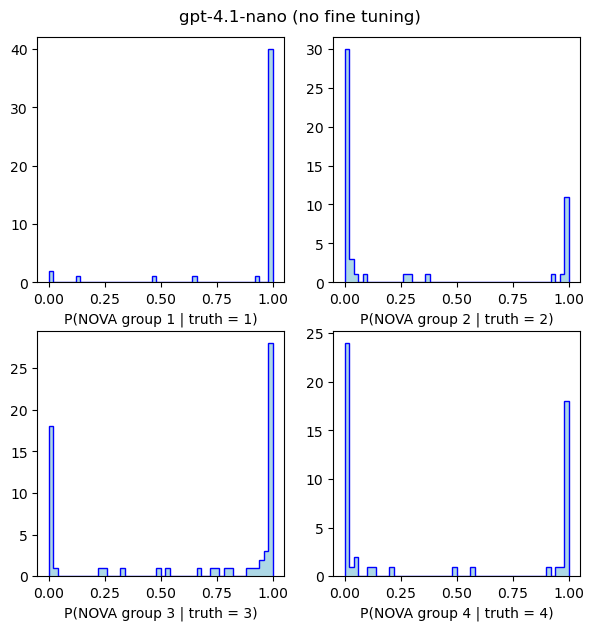

In [4]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(7, 7))

ax1.hist(results.query("truth == 1")["P1"], bins=50, range=(0, 1), histtype="step", fill=True, color="lightblue", edgecolor="blue")
ax1.set_xlabel("P(NOVA group 1 | truth = 1)")

ax2.hist(results.query("truth == 2")["P2"], bins=50, range=(0, 1), histtype="step", fill=True, color="lightblue", edgecolor="blue")
ax2.set_xlabel("P(NOVA group 2 | truth = 2)")

ax3.hist(results.query("truth == 3")["P3"], bins=50, range=(0, 1), histtype="step", fill=True, color="lightblue", edgecolor="blue")
ax3.set_xlabel("P(NOVA group 3 | truth = 3)")

ax4.hist(results.query("truth == 4")["P4"], bins=50, range=(0, 1), histtype="step", fill=True, color="lightblue", edgecolor="blue")
ax4.set_xlabel("P(NOVA group 4 | truth = 4)")

fig.suptitle("gpt-4.1-nano (no fine tuning)", y=0.92)

None